In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

2.7.1+cu118
True
NVIDIA GeForce RTX 3050 Laptop GPU


In [ ]:
import numpy as np
from src.dataset_loaders import get_ptb_xl_fmm_dataset
from src.utils import find_data_subfolder 

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
DATA_DIR = find_data_subfolder('')

## `Load Data`

In [ ]:
print("Loading FMM-enhanced PTB-XL dataset...")
data_dict = get_ptb_xl_fmm_dataset(
    datapath=DATA_DIR,
    num_leads=1,
    lead=0, 
    num_waves=5,
    sequence_length=2048,
    delete_high_A=False
)
print("Dataset loaded successfully.")


Loading FMM-enhanced PTB-XL dataset...


Loading 'test': 100%|██████████| 10907/10907 [01:08<00:00, 158.94it/s]


Dataset loaded successfully.


In [ ]:
X_dev_signal_raw = data_dict['train']['data'].astype(np.float32)
X_dev_coeffs_raw = data_dict['train']['coefficients'].astype(np.float32)
y_dev = data_dict['train']['labels'].astype(int)

print("Data loading complete.")

normal_class_id = data_dict['params']['normal_class']

Data loading complete.
Train signal shape: (95868, 2048, 1), Train coeffs shape: (95868, 21)


## `Visualization`

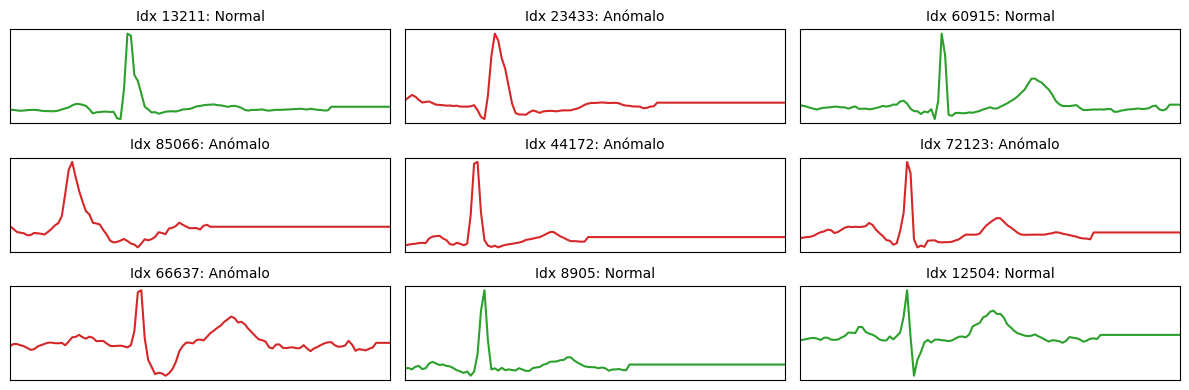

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from src.plot_signals import plot_ecg_with_fmm, subplot_ecg
from src.data_utils import array_to_fmm_dict 

labels_plot = (y_dev != normal_class_id).astype(int)  # 0=Normal, 1=Anómalo 
subplot_ecg(
    ecg_data=X_dev_signal_raw,
    labels=labels_plot,
    num_to_plot=9,
    lead=0
)
plt.show()

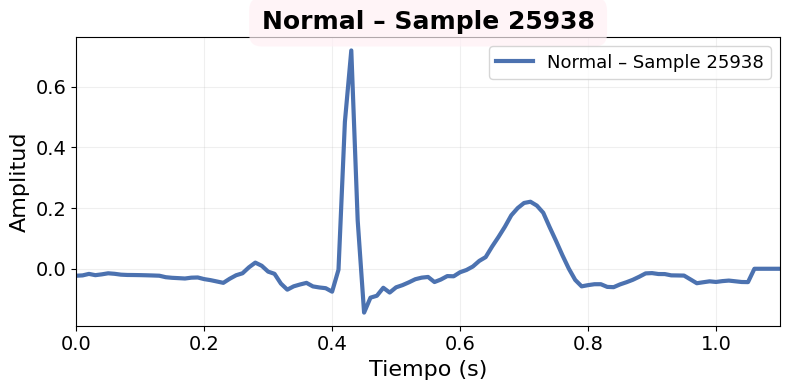

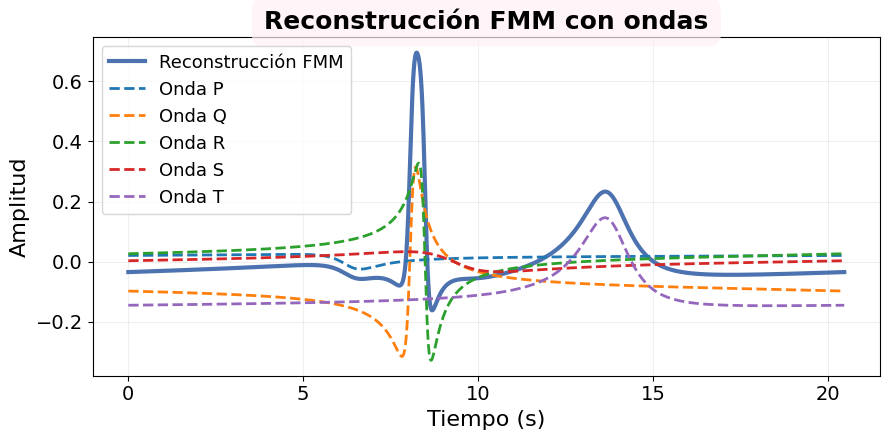

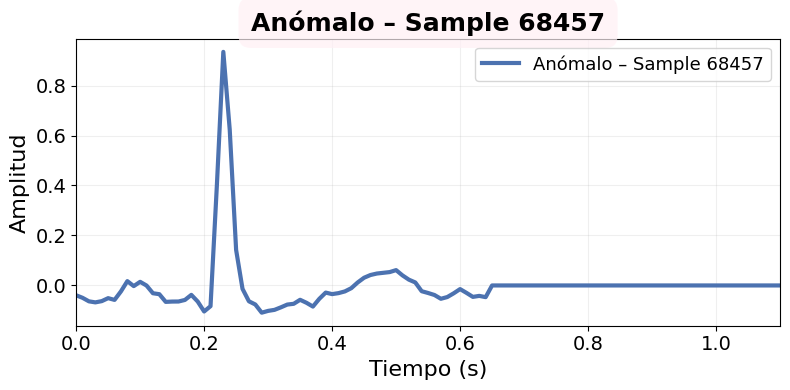

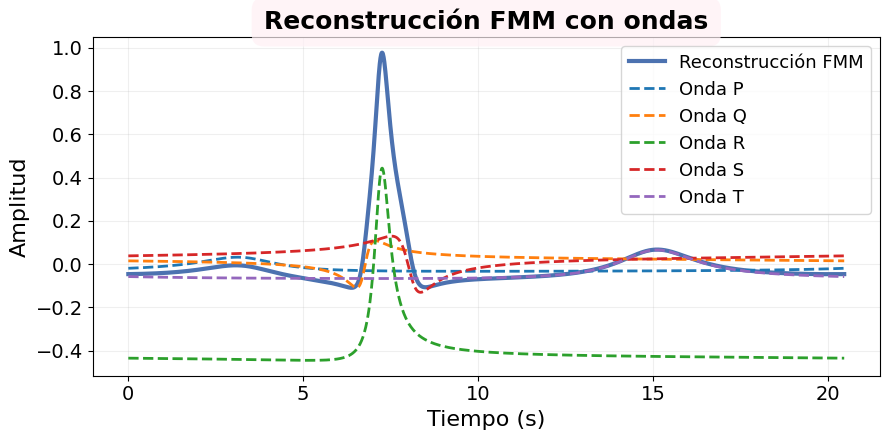

In [ ]:
def get_class_indices(labels: np.ndarray, class_id: int) -> np.ndarray:
    return np.where(labels == class_id)[0]

norm_indices = get_class_indices(y_dev, normal_class_id)
ano_indices = get_class_indices(y_dev, normal_class_id,)

# un ejemplo de cada clase
np.random.seed(50)
idx_norm = np.random.choice(norm_indices, 1)[0]
idx_ano  = np.random.choice(ano_indices, 1)[0]

for label_text, idx in zip(["Normal", "Anómalo"], [idx_norm, idx_ano]):
    ecg = X_dev_signal_raw[idx, :, 0]
    coeffs = X_dev_coeffs_raw[idx]

    plot_ecg_with_fmm(
        ecg=ecg,
        coeffs=coeffs,
        convert_fn=array_to_fmm_dict,
        num_leads=1,
        seq_len=2048,
        fs=100,
        lead=0,
        label=f"{label_text} – Sample {idx}"
    )
    plt.show()